In [61]:
#import statements

import math
import matplotlib as  mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rande
import time

mpl.rcParams['savefig.dpi'] = 500
mpl.rcParams['figure.dpi'] = 500

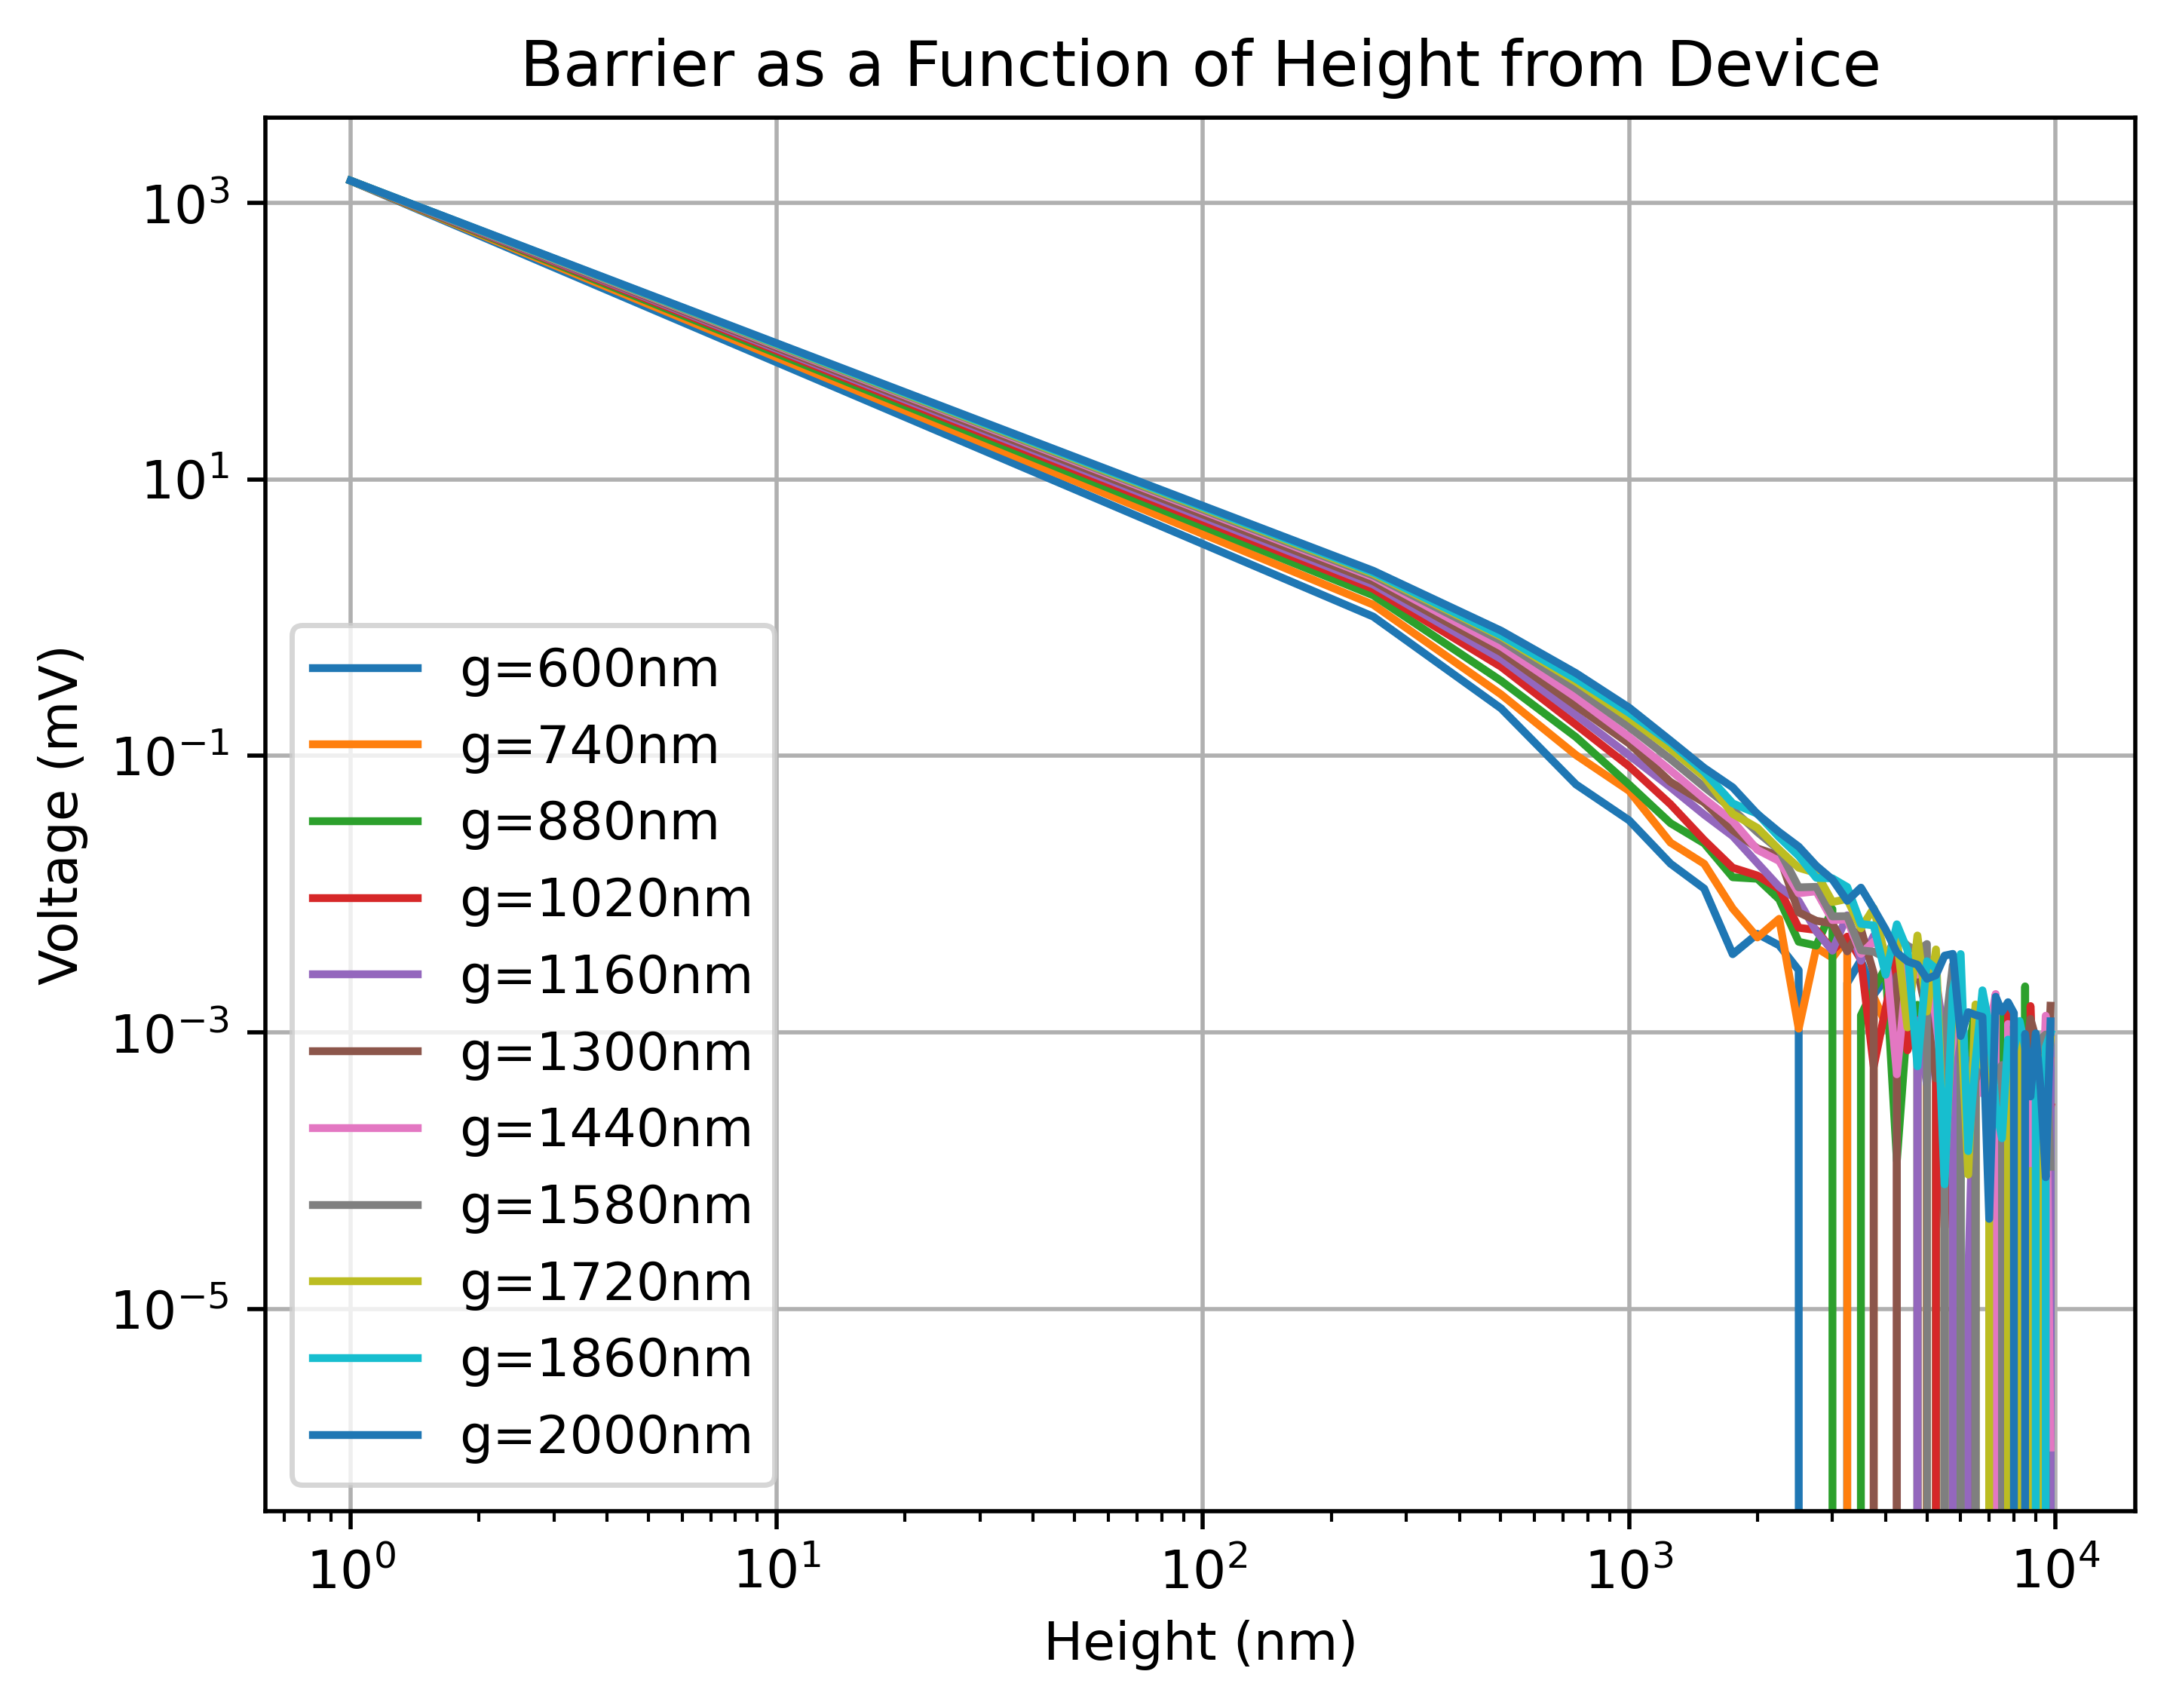

In [107]:
ics = open("ICSData.txt", "r")
icsStr = ics.read()
icsBigArr = icsStr.split('\n\n')
gaps = []
posgap = []
voltgap = []

for icsArrRun in icsBigArr[:-1]:
        icsArr = icsArrRun.split('\n')
        pos = []
        volt = []
        
        gap = int(float(((icsArr[0]).split('\t'))[1]))
        
        for pair in icsArr[2:-1]:
            splitPair = pair.split('\t')
            pos.append(float(splitPair[0]))
            volt.append(float(splitPair[1]))
        
        gaps.append(gap)
        posgap.append(pos)
        voltgap.append(volt)
    
ics.close()

tit = "Barrier as a Function of Height from Device"

fileStr = "barrier_vs_height(" + str(int(time.time())) + ")"

for itera in range(len(gaps)):
    plt.loglog(posgap[itera], voltgap[itera], label = "g=" + str(gaps[itera]) + "nm")
plt.grid()
plt.legend()
plt.xlabel("Height (nm)")
plt.ylabel("Voltage (mV)")
plt.title(tit)
#plt.savefig(fileStr + ".png")
plt.show()

icsWriter = open(fileStr + ".txt", "w+")
#icsWriter.write(icsStr)
icsWriter.close()

In [72]:
ics = open(fileStr + ".txt", "r")
icsStr = ics.read()
icsBigArr = icsStr.split('\n\n')
gaps = []
posgap = []
voltgap = []

for icsArrRun in icsBigArr[:-1]:
        icsArr = icsArrRun.split('\n')
        pos = []
        volt = []
        
        gap = int(float(((icsArr[0]).split('\t'))[1]))
        
        for pair in icsArr[2:-1]:
            splitPair = pair.split('\t')
            pos.append(float(splitPair[0]))
            volt.append(float(splitPair[1]))
        
        gaps.append(gap)
        posgap.append(pos)
        voltgap.append(volt)
    
ics.close()

tit = "Barrier as a Function of Height from Device"

fileStr = "barrier_vs_height(" + str(int(time.time())) + ")"

thermV = (8.617 * (10 ** (-5)) * 1.7) * 1000

fig = plt.figure()
ax = plt.subplot(111)

for itera in range(len(gaps)):
    plt.semilogy(posgap[itera], np.divide(voltgap[itera], 2), label = "g=" + str(gaps[itera]) + "nm")
#plt.semilogy(posgap[0], np.multiply(np.ones(len(voltgap[0])), thermV), 'r--', label = "$V_{therm}$")
plt.grid()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Height (nm)")
plt.ylabel("Voltage (mV)")
plt.title(tit)
#plt.savefig(fileStr + ".png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'barrier_vs_height(1679592113).txt'

/var/folders/4p/d3_fj1jj7gn923jgn2h61xwm0000gn/T/ipykernel_1869/3177527639.py:41: RuntimeWarning: invalid value encountered in log
  stats.append(np.polyfit(np.log(posgap[itera])[0:stopper], np.log(voltgap[itera])[0:stopper], 1))


LinAlgError: SVD did not converge in Linear Least Squares

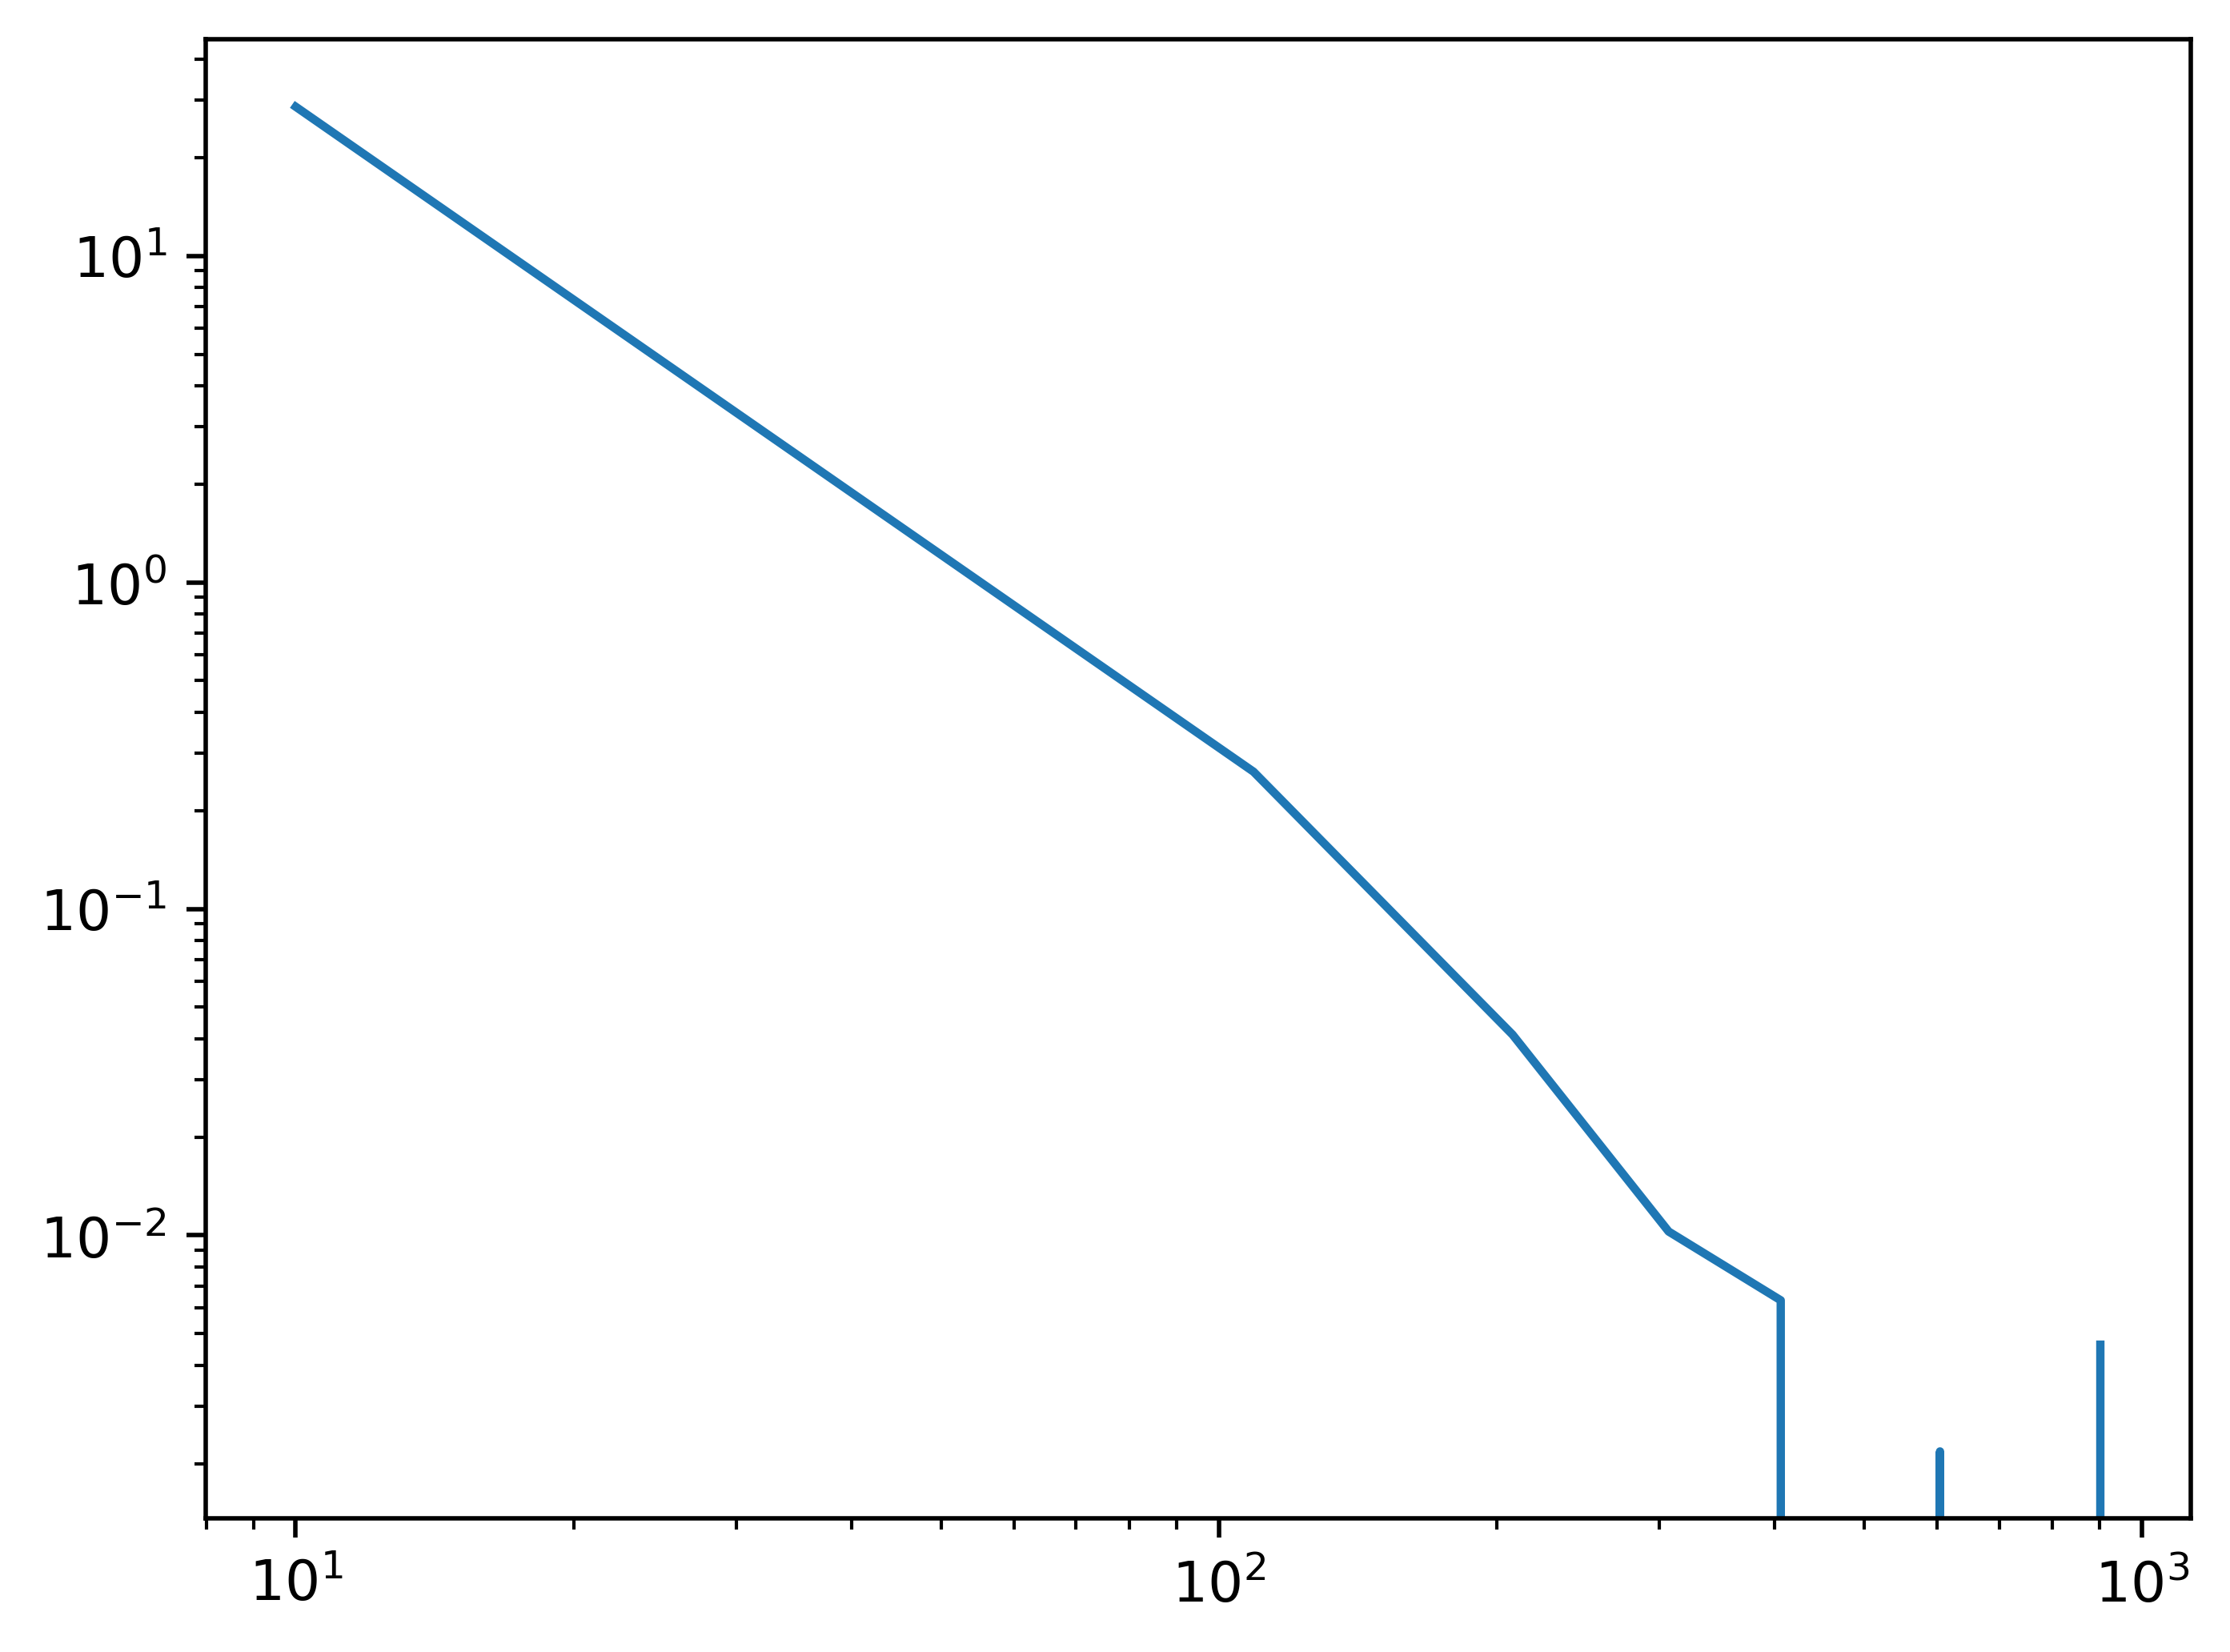

In [71]:
ics = open(fileStr + ".txt", "r")
icsStr = ics.read()
icsBigArr = icsStr.split('\n\n')
gaps = []
posgap = []
voltgap = []

for icsArrRun in icsBigArr[:-1]:
        icsArr = icsArrRun.split('\n')
        pos = []
        volt = []
        
        gap = int(float(((icsArr[0]).split('\t'))[1]))
        
        for pair in icsArr[2:-1]:
            splitPair = pair.split('\t')
            pos.append(float(splitPair[0]))
            volt.append(float(splitPair[1]))
        
        gaps.append(gap)
        posgap.append(pos)
        voltgap.append(volt)
    
ics.close()

tit = "Barrier as a Function of Height from Device"

fileStr = "barrier_vs_height(" + str(int(time.time())) + ")"

thermV = (8.617 * (10 ** (-5)) * 1.7) * 1000

fig = plt.figure()
ax = plt.subplot(111)

stats = []

stopper = int(len(voltgap[0]) / 1)

for itera in range(len(gaps)):
    plt.loglog(1 * np.array(posgap[itera])[0:stopper], np.divide(voltgap[itera], 2)[0:stopper], label = "g=" + str(gaps[itera]) + "nm")
    stats.append(np.polyfit(np.log(posgap[itera])[0:stopper], np.log(voltgap[itera])[0:stopper], 1))
#plt.loglog(1 * np.array(posgap[itera]), np.multiply(np.ones(len(voltgap[0])), thermV), 'r--', label = "$V_{therm}$")
plt.grid(which="both")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Height (nm)")
plt.ylabel("Voltage (mV)")
plt.title(tit)
#plt.savefig(fileStr + ".png")
plt.show()

In [56]:
print(stats)

[array([-3.00529589, 12.23509017]), array([-2.96201184, 12.37527203]), array([-2.93478558, 12.54190966]), array([-2.91750782, 12.71119697]), array([-2.89389499, 12.81808968]), array([-2.87078719, 12.90068292]), array([-2.84564088, 12.94882083]), array([-2.82326095, 12.99393863]), array([-2.79402591, 12.98940871]), array([-2.76279176, 12.96393088]), array([-2.74291471, 12.9822245 ])]


In [57]:
slopes = []
bints = []

for stat in stats:
    slopes.append(stat[0])
    bints.append(stat[1])

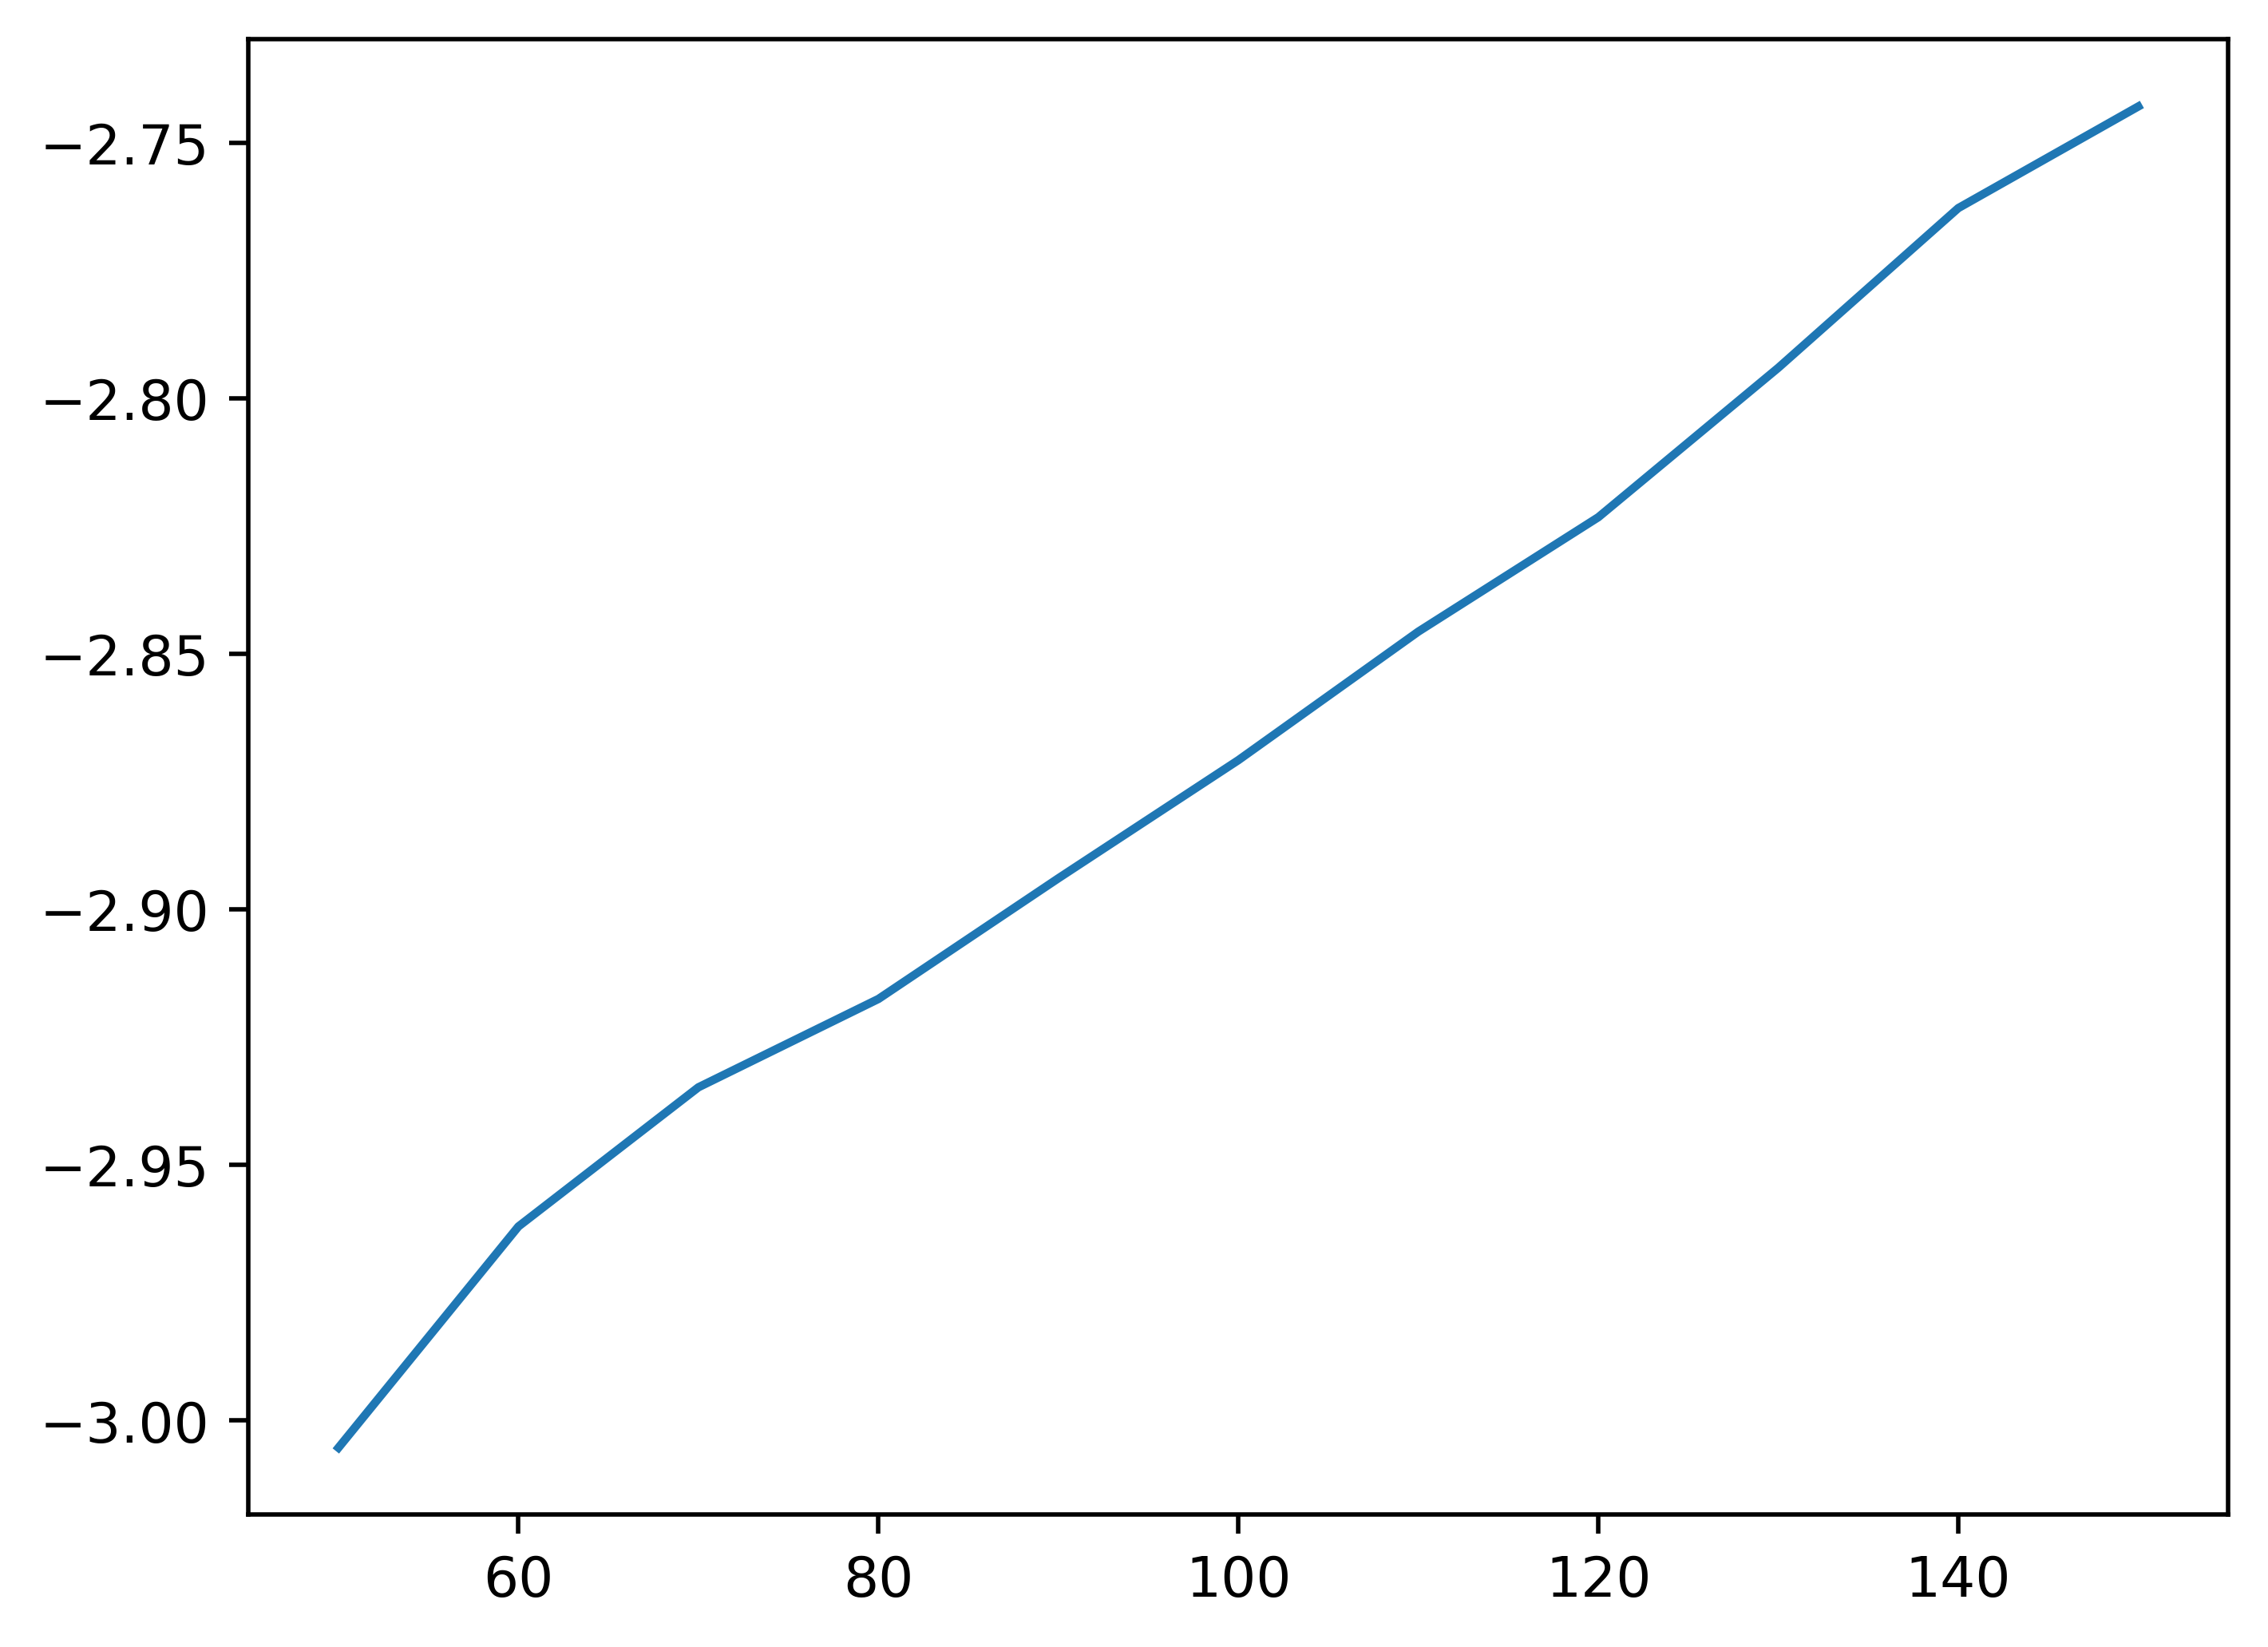

In [58]:
plt.plot(gaps, slopes)

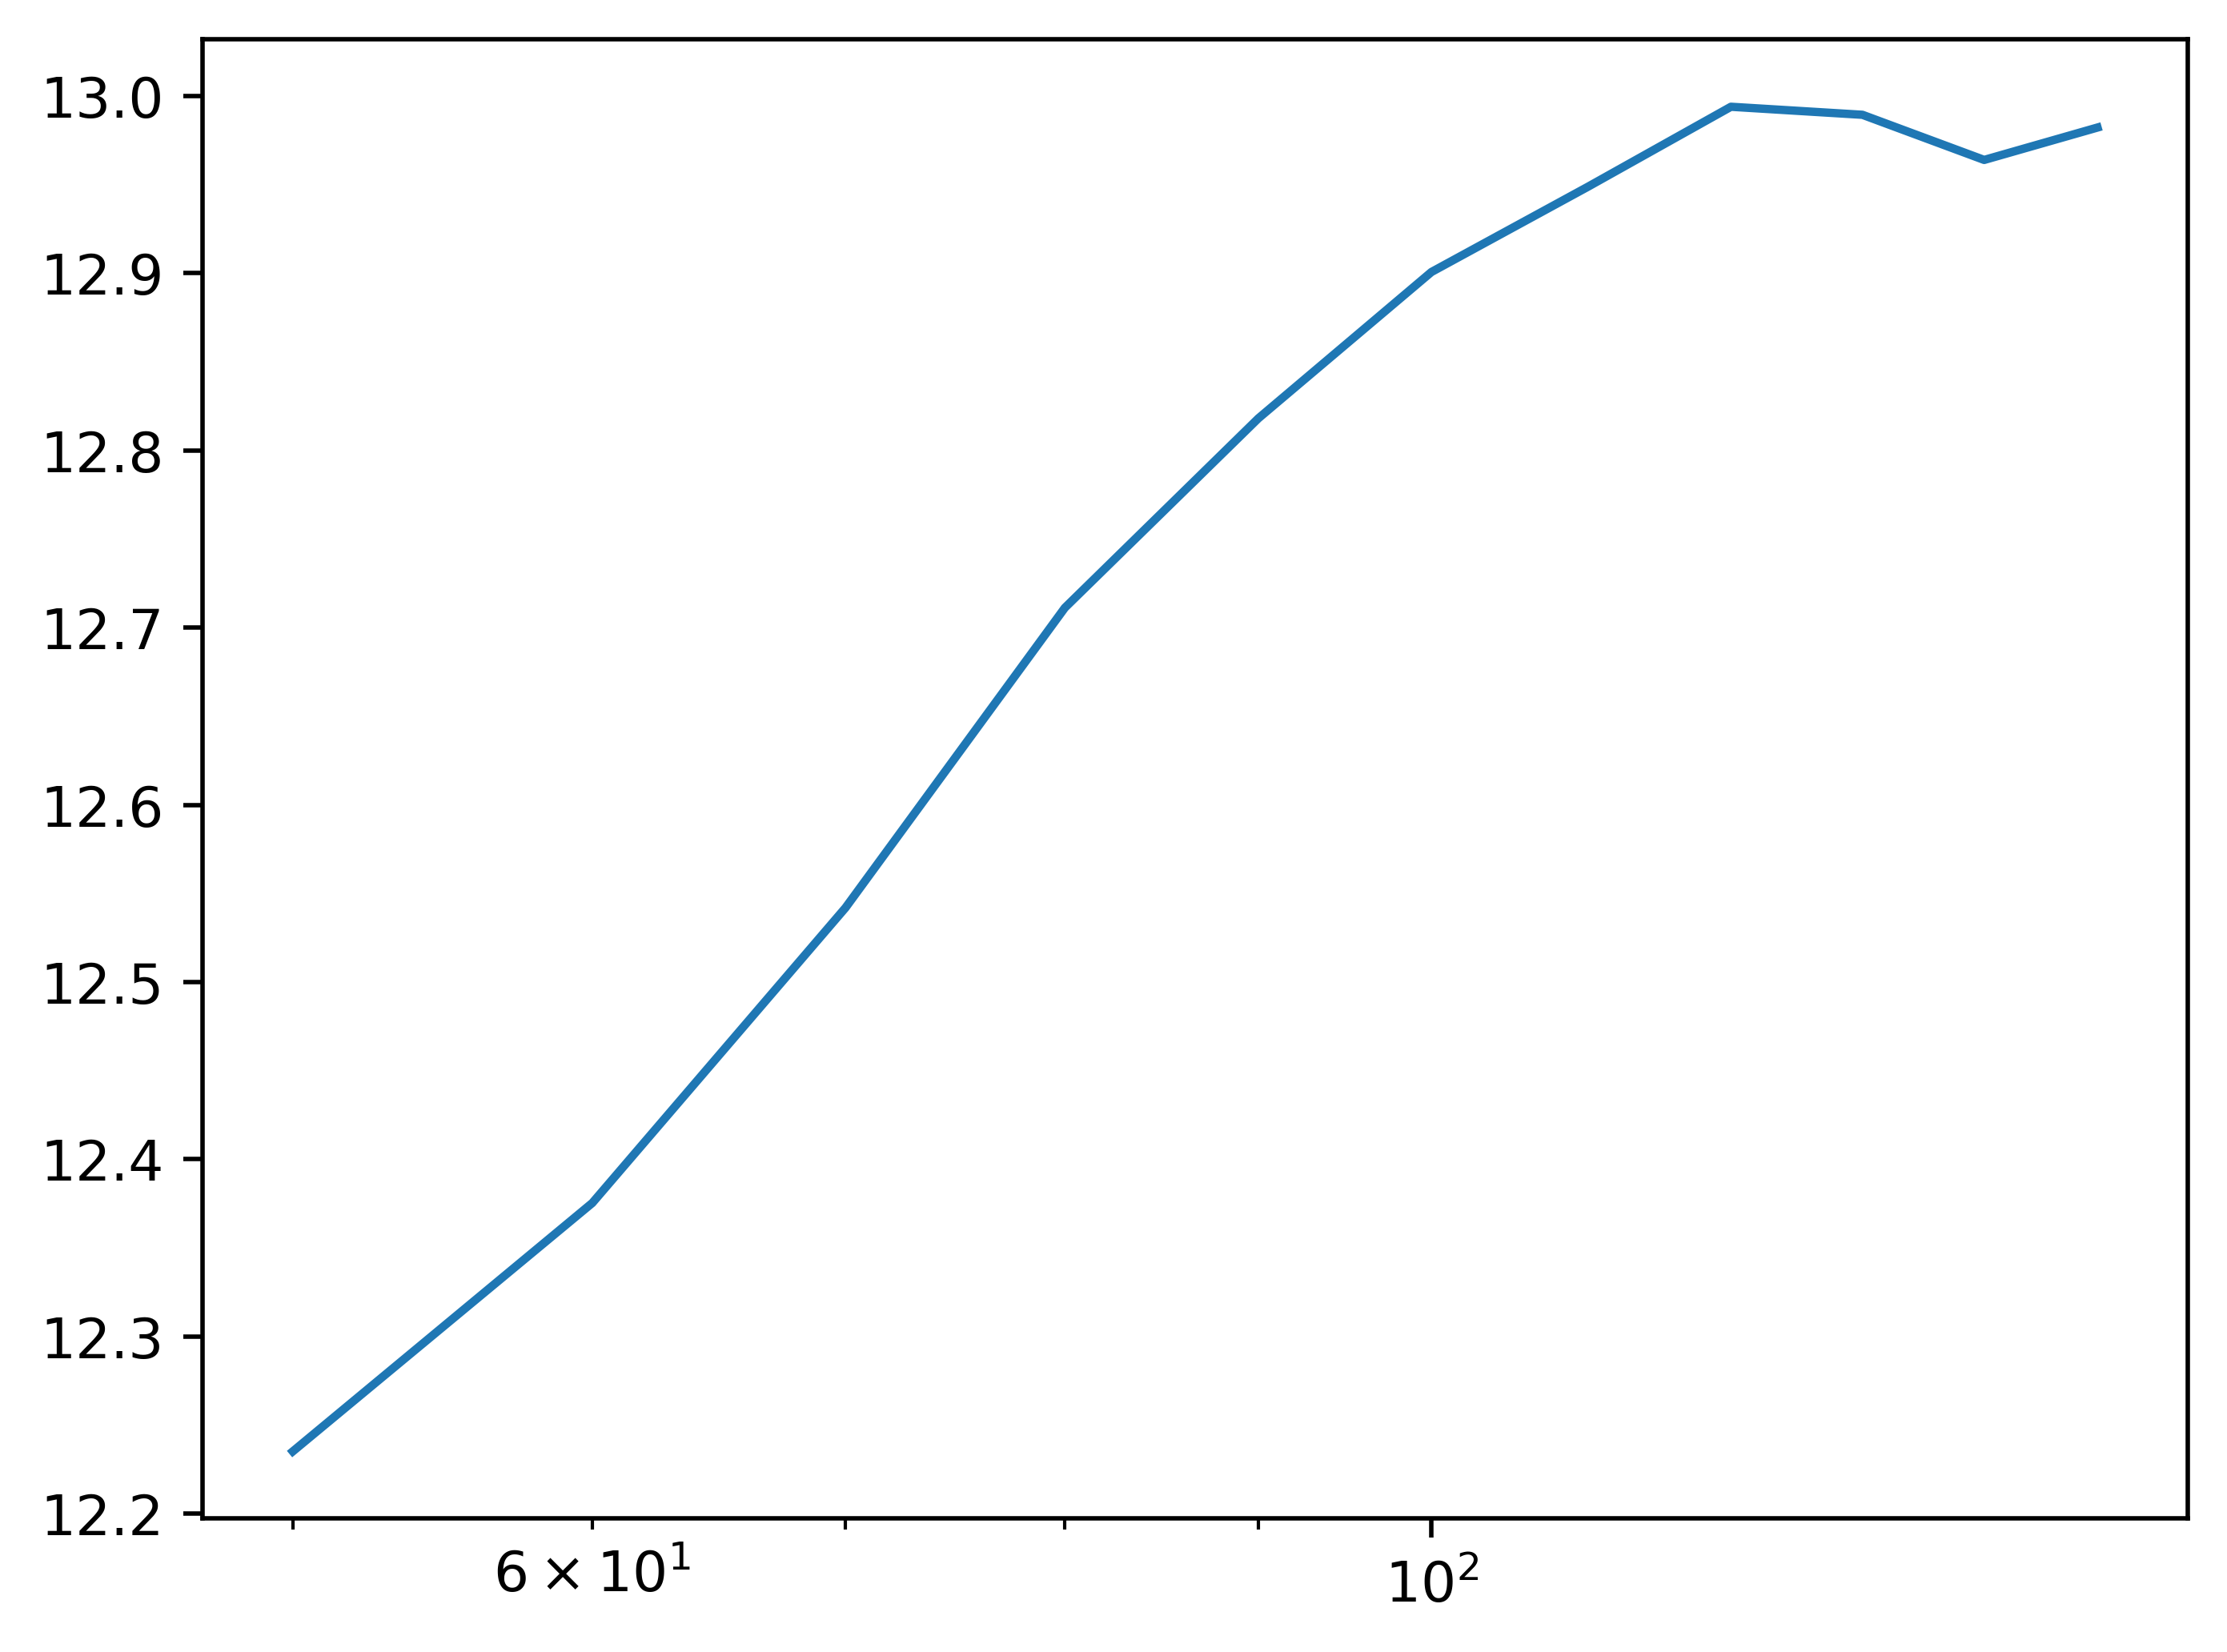

In [60]:
plt.semilogx(gaps, bints)

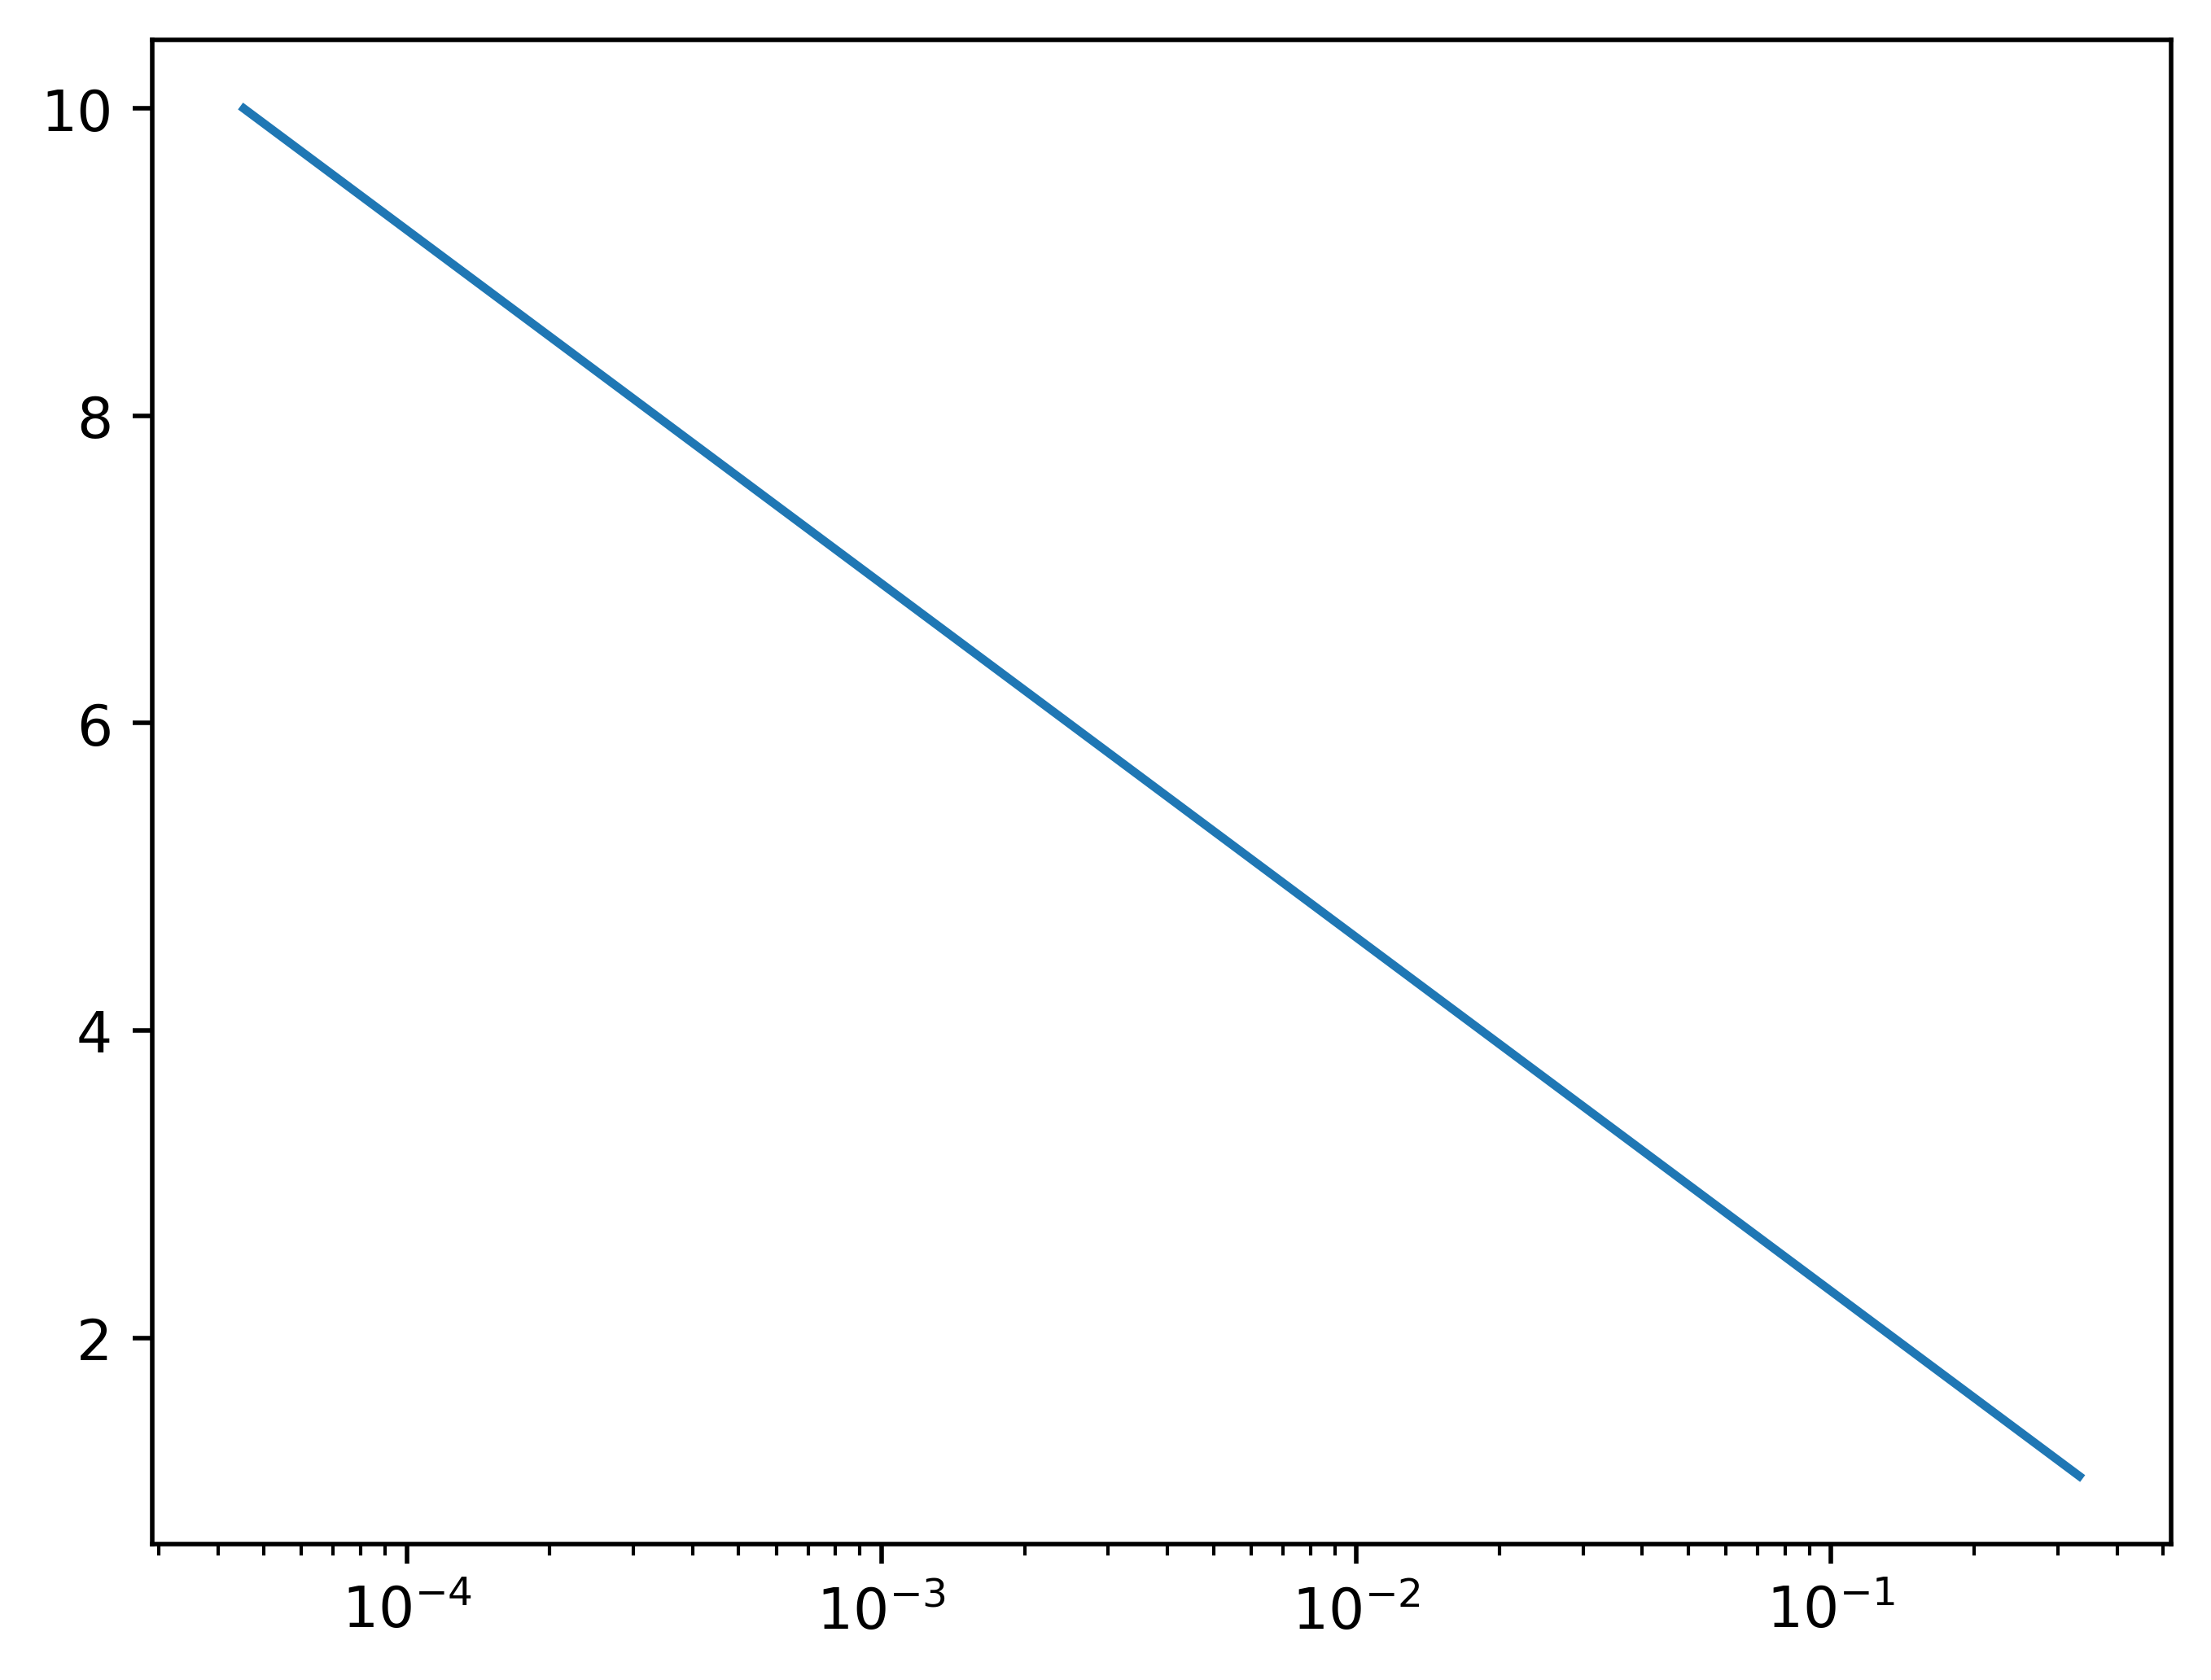

In [101]:
x = np.linspace(1.1,1e1, num = 1000)
plt.semilogx(np.power(np.exp(x), -1), x)